# Camera Calibration


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
%matplotlib inline

In [6]:
#Read the image
images=glob.glob('calibration_wide/GOPR*.jpg')
# plt.imshow(images)


In [8]:
#Array to hold the image points and the object points
objpoints=[] # 3D Image points in real world space
imgpoints=[] # 2D point in image space

# Prepare the objest points like (0,0,0),(1,0,0),(2,0,0)......(7,5,0)
objp = np.zeros((6*8,3),np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

for image in images:
    # print(image)
    #Read the image
    img = mpimg.imread(image)
    #To find out the image points we need to find the image corner. First make the image to grayscale

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #     plt.imshow(gray,cmap='gray')
    #Find the chessboard corner 
    ret,corners=cv2.findChessboardCorners(gray,(8,6),None)
    if ret==True:
        imgpoints.append(corners)
        objpoints.append(objp)
        #Draw and display the corners
#         cv2.drawChessboardCorners(gray,(8,6),corners,ret)
#         plt.imshow(gray,cmap='gray')


        


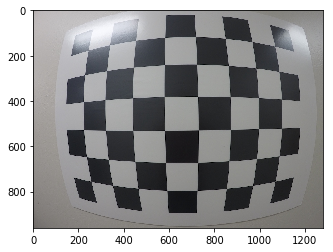

In [9]:
test_image = mpimg.imread('calibration_wide/GOPR0034.jpg')
plt.imshow(test_image)

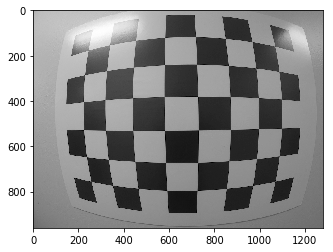

In [10]:
gray_test_image  = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_test_image,cmap='gray')

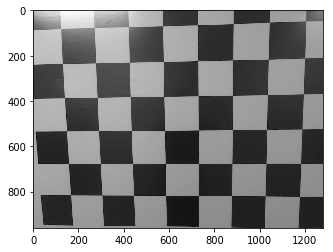

In [11]:
img_shape=gray_test_image.shape
ret,mtx,dist,rvec,tvec = cv2.calibrateCamera(objpoints,imgpoints,img_shape[::-1],None,None)
undistorted_image = cv2.undistort(gray_test_image,mtx,dist,None,mtx)
plt.imshow(undistorted_image,cmap='gray')